In [27]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import data set
def import_dataset(fname, indep=-1, dep=3):
    dataset = pd.read_csv(fname, )
    # read all rows, for all but last column
    x = dataset.iloc[:, :indep].values
    # read all rows, for last column
    y = dataset.iloc[:, dep].values
    return x,y

# handling missing data
def handle_missing(x):
    from sklearn.preprocessing import Imputer
    imputer = Imputer(missing_values='NaN',
                      strategy='mean',
                      axis=0)
    # fit only columns with missing data
    # that is starting from column 1 to 3
    # this can be identified by checking for NaN
    imputer = imputer.fit(x[:, 1:3])
    x[:, 1:3] = imputer.transform(x[:, 1:3])
    return x


# encoding categories
def encode_categories(x,y):
    from sklearn.preprocessing import (LabelEncoder,
                                       OneHotEncoder)
    label_encoder_x = LabelEncoder()
    x[:,0] = label_encoder_x.fit_transform(x[:,0])
    onehotencoder = OneHotEncoder(
        categorical_features=[0])
    x = onehotencoder.fit_transform(x).toarray()

    label_encoder_y = LabelEncoder()
    y = label_encoder_y.fit_transform(y)
    return x,y


# splitting the dataset in training and test set
def split(x, y, test_size=0.2):
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size, random_state=0)
    return x_train,x_test,y_train,y_test

# feature scaling
# standardisation and normalisation
def feature_scale(train, test):
    from sklearn.preprocessing import StandardScaler
    sc_x = StandardScaler()
    train = sc_x.fit_transform(train)
    test = sc_x.transform(test)
    return train,test

# fit simple linear regression to the training set
# regressor learns the correlation between input and output
def simple_linear_regression(xt, yt):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(xt,yt)
    return regressor

def plot_chart(x, y, xt, regressor, t, xl, yl, c1, c2):
    plt.scatter(x, y, color=c1)
    plt.plot(xt, regressor.predict(xt), color=c2)
    plt.title(t)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

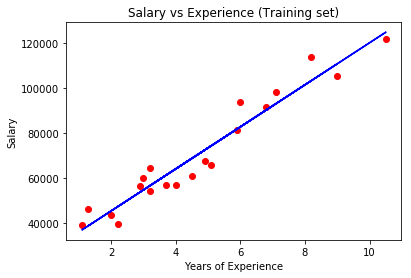

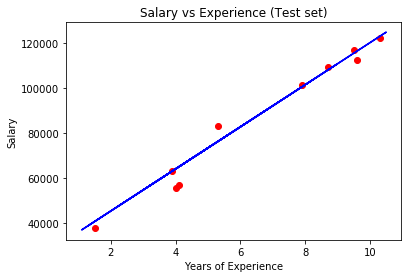

In [30]:
x,y = import_dataset('Salary_Data.csv',indep=-1,dep=1)
x_train,x_test,y_train,y_test = split(x,y,test_size=1/3)

# fitting SLR to training set
regressor = simple_linear_regression(x_train,y_train)
# predicting test set results
y_pred = regressor.predict(x_test)
# visualizing the train set and test results
plot_chart(x_train,y_train,x_train,regressor,
          'Salary vs Experience (Training set)',
          'Years of Experience', 'Salary',
          'red', 'blue')
plot_chart(x_test,y_test,x_train,regressor,
          'Salary vs Experience (Test set)',
          'Years of Experience', 'Salary',
          'red', 'blue')
